<a href="https://colab.research.google.com/github/Sunflower47/Portfolio/blob/main/ozon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Задание

Задание посвящено работе с данными содержания озона в атмосфере Земли за несколько десятилетий. Вам нужно проанализировать данные в формате NetCDF, нарисовать график и вывести статистическую информацию в файл формата JSON. Программа должна быть представлена в файле ozon.py, график в файле ozon.png и выходные результаты в файле ozon.json. 

Нужно модифицировать код ozon.py таким образом, чтобы для заданных пользователем долготы и широты программа извлекала из файла MSR-2.nc требуемые данные и рассчитывала:

-максимальное, минимальное и среднее содержание озона;

-максимальное, минимальное и среднее содержание озона среди январей всех лет;

-максимальное, минимальное и среднее содержание озона среди июлей всех лет.

Рассчитанные метрики следует сохранить в файле ozon.json.

Одновременно с этим, для заданных пользователем долготы и широты программа должна сохранять файл ozon.png с одним графиком, на котором разными цветами приведены зависимости:

-зависимость содержания озона от времени для всего доступного интревала;

-зависимость содержания озона от времени для всех январей;

-зависимость содержания озона от времени для всех июлей

##Код

###Импорт библиотек

In [62]:
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
import json

###Распаковка файла

In [63]:
with netcdf.netcdf_file('/content/miniMSR-2.nc', mmap=False) as netcdf_file:
  variables = netcdf_file.variables

longitude = variables['longitude']
latitude = variables['latitude']
ozon = variables['Average_O3_column']
time = variables['time']

long_in = 18.96 
lat_in = 69.66

ind_long = np.searchsorted(longitude.data, long_in)  #индексы введенных координат
ind_lat = np.searchsorted(latitude.data, lat_in)

if ind_long == len(longitude.data):
  ind_long -= 1
if ind_lat == len(latitude.data):
  ind_lat -= 1

ozon_data = ozon.data[:,ind_lat, ind_long]

###Поиск минимума, максимума и среднего

In [64]:
max = np.amax(ozon_data)
min = np.amin(ozon_data)
mean = np.mean(ozon_data)

###Поиск минимума, максимума и среднего среди всех январей

In [65]:
jan_data = ozon_data[::12]
jan_time = time.data[::12]
max_jan = np.amax(jan_data)
min_jan = np.amin(jan_data)
mean_jan = np.mean(jan_data)



###Поиск минимума, максимума и среднего среди всех июлей

In [66]:
jul_data = ozon_data[6::12]
jul_time = time.data[6::12]
max_jul = np.amax(jul_data)
min_jul = np.amin(jul_data)
mean_jul = np.mean(jul_data)

###Сохранение данных в json

In [67]:
json_data =  {
                "coordinates": [float(long_in), float(lat_in)],
                "jan": {
                  "min": float(min_jan),
                  "max": float(max_jan),
                  "mean": float(mean_jan)
                },
                "jul": {
                  "min": float(min_jul),
                  "max": float(max_jul),
                  "mean": float(mean_jul)
                },
                "all": {
                  "min": float(min),
                  "max": float(max),
                  "mean":float(mean)
                }
}
with open ('ozon.json', 'w') as f:
  json.dump(json_data, f)

###Построение графиков

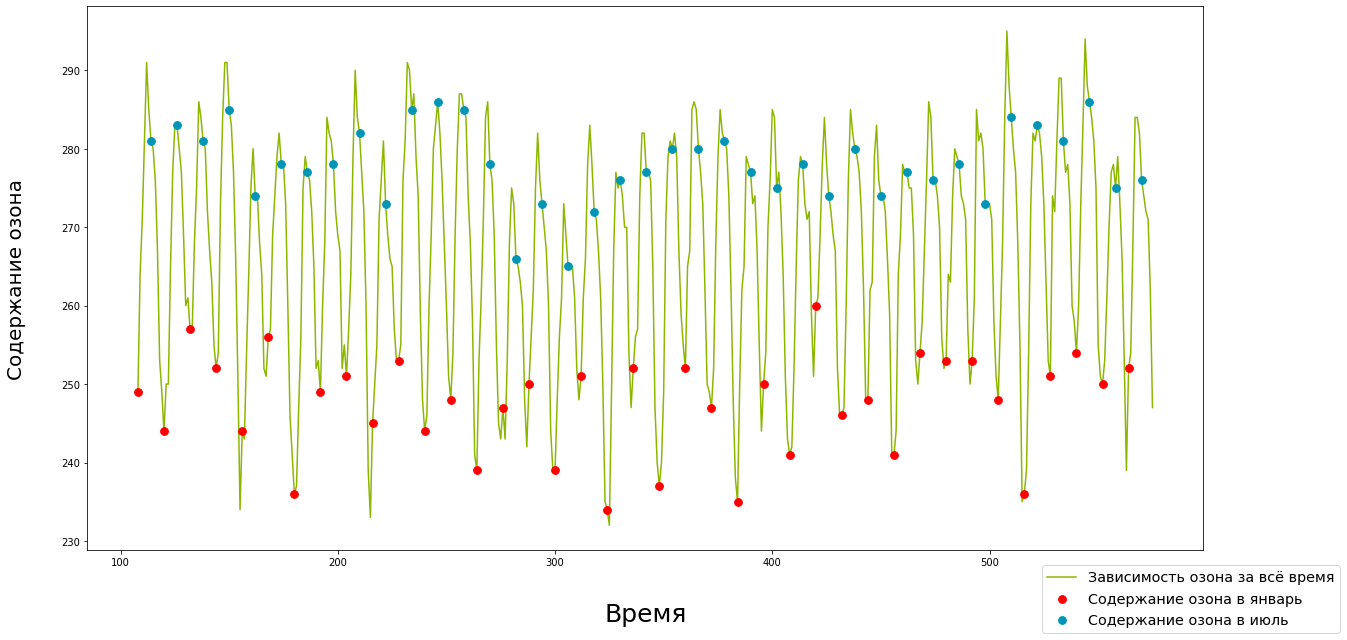

In [68]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
fig.get_dpi
plt.scatter(jan_time, jan_data, color='red', s=60, label='Содержание озона в январь')
plt.scatter(jul_time, jul_data, color='#0095B6', s=60, label='Содержание озона в июль')
plt.plot(time.data, ozon_data,  color='#8DB600', zorder=0, label='Зависимость озона за всё время')
fig.legend(fontsize='x-large', loc='lower right')
plt.ylabel('Содержание озона', fontsize=20, labelpad=35)
plt.xlabel('Время', fontsize=25, labelpad=35)
fig.savefig('ozon.png')